# Process Data 1

Notebook with tools for analyzing, segmenting, and processing experimental data from force-sensing tensegrity.

Andrew Barkan
11/21/2019

In [10]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn as sk

Specify the experimental data you would like to load, and make sure this script has access to it.

In [11]:
# Change to reflect your working directory for the repo
#data_filename = r"C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Data\test_2019_10_21\test_1\TEST1.csv"
data_filename = r"/home/andrew/Documents/BEST/Tensegrity-HRI/Data/test_2019_11_19/test_1/TEST1A1.CSV"

raw_data = pd.read_csv(data_filename, names = ["IND", "time", "FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                                               "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12",
                                              "ACC_X", "ACC_Y", "ACC_Z"])
# Remove indicator column
raw_data = raw_data.drop(columns = ["IND"])
raw_data.head()

,time,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,FSR_6,FSR_7,FSR_8,FSR_9,FSR_10,FSR_11,FSR_12,ACC_X,ACC_Y,ACC_Z
0,136744078,71,77,45,110,250,181,87,264,275,434,5,89,7.21,2.97,5.96
1,136745078,71,78,44,109,249,180,91,264,273,434,5,93,7.21,2.97,5.96
2,136746078,70,79,43,107,253,184,97,265,276,432,5,91,7.21,2.97,5.96
3,136747078,74,80,41,107,252,178,84,265,276,433,5,88,7.21,2.97,5.96
4,136750733,68,81,43,104,253,180,87,265,276,434,6,88,7.21,2.97,5.96


In [12]:
# Convert from microsecs to seconds
raw_data["time"] = raw_data["time"].apply(lambda x: (x-raw_data["time"][0])*1e-6)
raw_data = raw_data.set_index("time")

In [13]:
# Split data into force and acceleration data
raw_fsr_data = raw_data[["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                        "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12"]]

raw_acc_data = raw_data[["ACC_X", "ACC_Y", "ACC_Z"]]

In [14]:
# Reorder FSR data based on conventions
raw_fsr_data = raw_fsr_data[["FSR_9", "FSR_10", "FSR_2", "FSR_1", "FSR_5", "FSR_6", 
                             "FSR_7", "FSR_8", "FSR_12", "FSR_11", "FSR_4", "FSR_3"]]
raw_fsr_data.columns = ["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                        "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12"]

In [15]:
# Force divider function
def force_divider(x):
    k_outer = 3.738
    k_inner = 0.368
    dist = x/k_inner
    return (k_outer + k_inner)*dist

# FSR model function
def FSR_model(x):
    return 131.2*np.exp(0.7801*x)/1000

In [16]:
# Convert FSR signals to actual forces in N
fsr_data = raw_fsr_data[["FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", 
                         "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12"]] = raw_fsr_data[[
    "FSR_1", "FSR_2", "FSR_3", "FSR_4", "FSR_5", "FSR_6", "FSR_7", "FSR_8", "FSR_9", "FSR_10", "FSR_11", "FSR_12"]].apply(
    lambda x: force_divider(FSR_model(x*(5/1023))), axis=1).copy()


fsr_data.head()

,FSR_1,FSR_2,FSR_3,FSR_4,FSR_5,FSR_6,FSR_7,FSR_8,FSR_9,FSR_10,FSR_11,FSR_12
time,,,,,,,,,,,,
0.000000,4.177073,7.658735,1.963395,1.918989,3.797301,2.918901,2.039701,4.005506,2.055315,1.492053,2.226649,1.737879
0.001000,4.145341,7.658735,1.970896,1.918989,3.782850,2.907793,2.071048,4.005506,2.086901,1.492053,2.218176,1.731266
0.002000,4.193030,7.600555,1.978425,1.911686,3.840986,2.952480,2.118973,4.020807,2.071048,1.492053,2.201325,1.724677
0.003000,4.193030,7.629589,1.985982,1.941065,3.826369,2.885703,2.016503,4.020807,2.047493,1.492053,2.201325,1.711575
0.006655,4.193030,7.658735,1.993569,1.897164,3.840986,2.907793,2.039701,4.020807,2.047493,1.497753,2.176289,1.724677


In [17]:
# An example plot of force data over time
fsr_data.plot(figsize=(15,10))

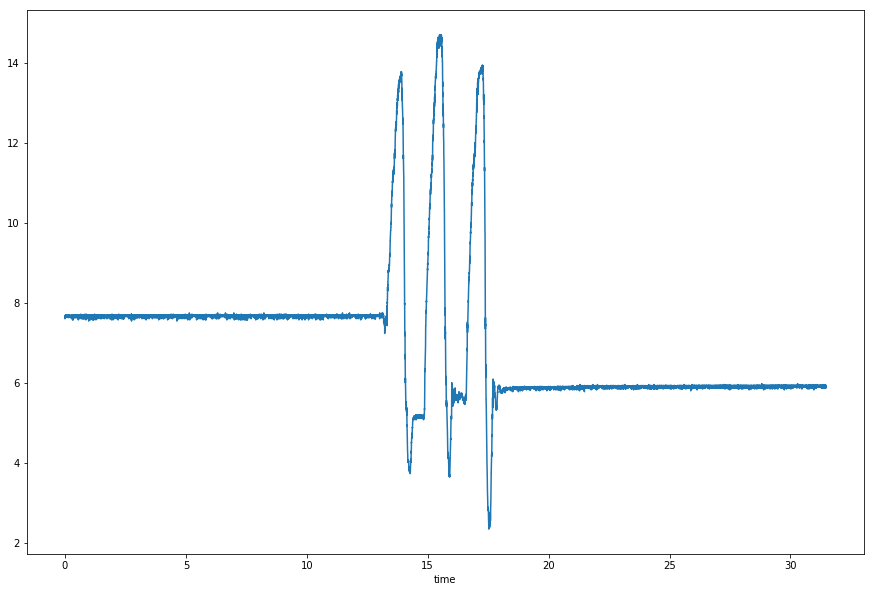

In [18]:
fsr_data["FSR_2"].plot(figsize=(15,10))